# Visual story telling part 2: Capital Metro data
The file capmetro_UT.csv contains data from Austin's own Capital Metro bus network, including shuttles to, from, and around the UT campus. These data track ridership on buses in the UT area. Ridership is measured by an optical scanner that counts how many people embark and alight the bus at each stop. Each row in the data set corresponds to a 15-minute period between the hours of 6 AM and 10 PM, each and every day, from September through November 2018. The variables are:
* timestamp: the beginning of the 15-minute window for that row of data
* boarding: how many people got on board any Capital Metro bus on the UT campus in the specific 15 minute window
* alighting: how many people got off ("alit") any Capital Metro bus on the UT campus in the specific 15 minute window
* day_of_week and weekend: Monday, Tuesday, etc, as well as an indicator for whether it's a weekend.
* temperature: temperature at that time in degrees F
* hour_of_day: on 24-hour time, so 6 for 6 AM, 13 for 1 PM, 14 for 2 PM, etc.
* month: July through December

Your task is to create a figure, or set of related figures, that tell an interesting story about Capital Metro ridership patterns around the UT-Austin campus during the semester in question. Provide a clear annotation/caption for each figure, but the figure(s) should be more or less stand-alone, in that you shouldn't need many, many paragraphs to convey its meaning. Rather, the figure together with a concise caption should speak for itself as far as possible.

You have broad freedom to look at any variables you'd like here -- try to find that sweet spot where you're showing genuinely interesting relationships among more than just two variables, but where the resulting figure or set of figures doesn't become overwhelming/confusing. (Faceting/panel plots might be especially useful here.)

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from pandas.api.types import CategoricalDtype
import seaborn as sns

In [3]:
df = pd.read_csv('C:/Users/dines/OneDrive/Documents/Dinesh @ UTA/MSBA/Summer/Intro to Machine Learning/STA380-master/data/capmetro_UT.csv')

In [4]:
df.head(5)

,timestamp,boarding,alighting,day_of_week,temperature,hour_of_day,month,weekend
0,2018-09-01 06:00:00,0,1,Sat,74.82,6,Sep,weekend
1,2018-09-01 06:15:00,2,1,Sat,74.82,6,Sep,weekend
2,2018-09-01 06:30:00,3,4,Sat,74.82,6,Sep,weekend
3,2018-09-01 06:45:00,3,4,Sat,74.82,6,Sep,weekend
4,2018-09-01 07:00:00,2,4,Sat,74.39,7,Sep,weekend


Measuring redership by the number of people who boarded the bus

In [5]:
# Calculate the week number and create a new column 'week'
df['date'] = pd.to_datetime(df['timestamp'])
df['week'] = df['date'].dt.week
df['day'] = df['date'].dt.date

C:\Users\dines\AppData\Local\Temp\ipykernel_18192\746817107.py:3: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead.
  df['week'] = df['date'].dt.week


## Finding if temperature affects ridership

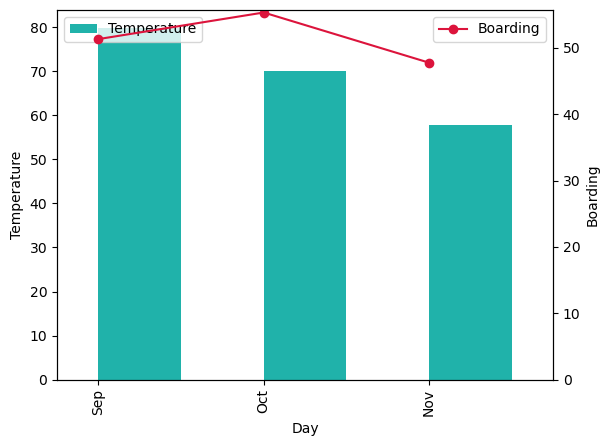

In [6]:
# Assuming df has been defined previously
df['WM'] = df['week'].astype(str) + '-' + df['month'].astype(str)

# Create a Figure and Axes object
fig, ax1 = plt.subplots()

# Reverse the order of the months
months_ordered = df['month'].unique()

# Plot the first bar graph with reversed order
df.groupby('month')['temperature'].mean().loc[months_ordered].plot(kind='bar', ax=ax1, color='#20B2AA', position=0)

# Create a twin Axes object for the second graph
ax2 = ax1.twinx()

# Plot the line graph on the second Axes with reversed order
df.groupby('month')['boarding'].mean().loc[months_ordered].plot(kind='line', ax=ax2, color='#DC143C', marker='o')

# Set y-axis limits for both axes to start from 0
ax1.set_ylim(0, ax1.get_ylim()[1])
ax2.set_ylim(0, ax2.get_ylim()[1])

# Customize labels and legends
ax1.set_ylabel('Temperature')
ax2.set_ylabel('Boarding')
ax1.set_xlabel('Day')
ax1.legend(['Temperature'], loc='upper left')
ax2.legend(['Boarding'], loc='upper right')

plt.show()


From the graph above there is no clear relation between the tempreature and ridership, now let's round the temperatures and see if during the day if higher tempratures lead to higher ridership (considering ridership as mean of boarding)

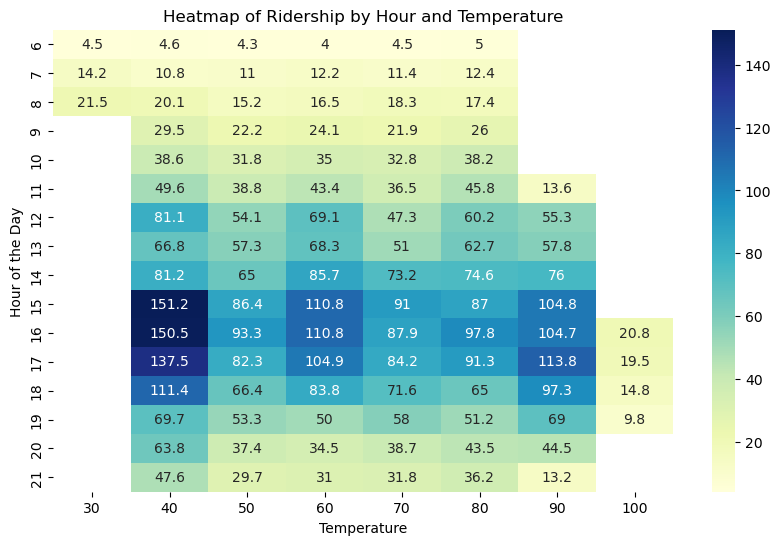

In [7]:
df['rounded_temperatures'] = df['temperature'].apply(lambda x: round(x / 10) * 10)
heatmap_data = df.pivot_table(index='hour_of_day', columns='rounded_temperatures', values='boarding',aggfunc='mean')
heatmap_data = heatmap_data.applymap(lambda x: round(x, 1))

# Create a heatmap
plt.figure(figsize=(10, 6))  # Adjust the figure size if needed
sns.heatmap(heatmap_data, annot=True, cmap='YlGnBu', fmt='g')
plt.title('Heatmap of Ridership by Hour and Temperature')
plt.xlabel('Temperature')
plt.ylabel('Hour of the Day')
plt.show()

As we can see lower extreme temperature have nearly 50% higher mean ridership compared to other temperatures 

You observe more ridership during evening as everyone who alit earlier is now leaving

## Ridership on different days of the week

<Figure size 1000x600 with 0 Axes>

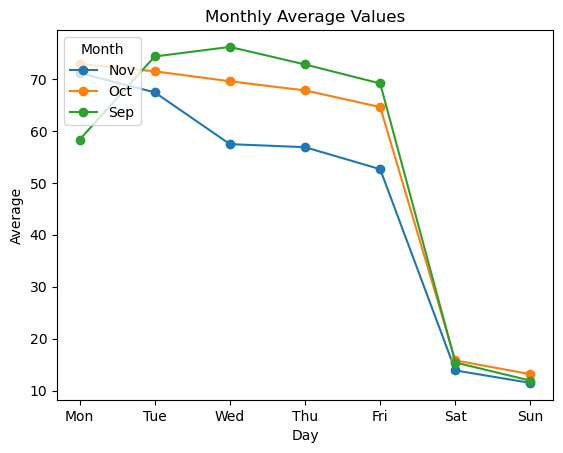

In [8]:
# assuming boarded is the number of people hoped on
month_day = df.groupby(['month','day_of_week'])['boarding'].mean()
month_day = month_day.reset_index()
#print(month_day)
# Specify the custom order for days
custom_order = ['Mon','Tue','Wed','Thu','Fri','Sat','Sun']

# Convert 'day' column to a categorical variable with the custom order
cat_type = CategoricalDtype(categories=custom_order, ordered=True)
month_day['day_of_week'] = month_day['day_of_week'].astype(cat_type)
#print(month_day)

pivot_df = month_day.pivot(index='day_of_week', columns='month', values='boarding')

# Create a line chart
plt.figure(figsize=(10, 6))
pivot_df.plot(kind='line', marker='o')

# Add labels and title
plt.xlabel('Day')
plt.ylabel('Average')
plt.title('Monthly Average Values')

# Show legend
plt.legend(title='Month', loc='upper left')

# Show the plot
plt.show()

The weekends have the lowest mean ridership, an other identifiable trend is that november has lower mean ridership, let's drill down to a week level, to understand why

Text(0, 0.5, 'Mean Boarding')

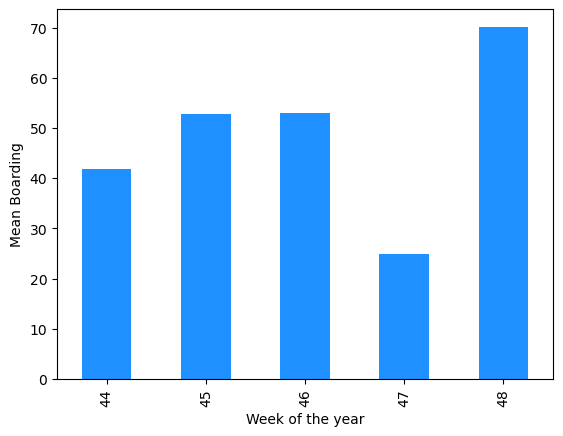

In [14]:
df_nov = df[df['month'] == 'Nov']
df_nov.groupby('week')['boarding'].mean().plot(kind='bar',color='#1E90FF')
plt.xlabel('Week of the year')
plt.ylabel('Mean Boarding')

The week 47 (week of year) is the thanksgiving week hence we see a declined ridership, this is followed by 1st weeks of school where everyone is trying to wrap things around

## What times is the campus busiest?

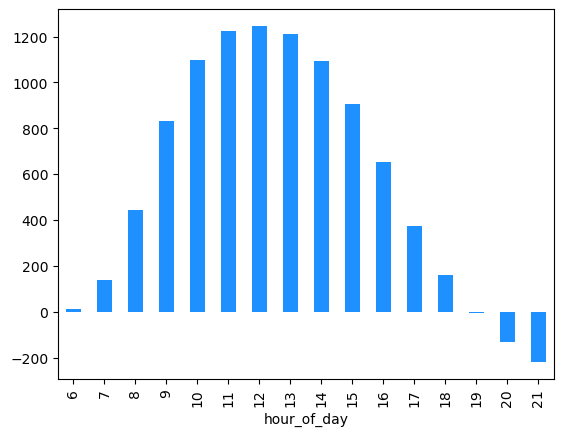

In [10]:
df['ac_sum'] = df.groupby('day')['alighting'].cumsum()
df['bc_sum'] = df.groupby('day')['boarding'].cumsum()
df['absolute_diff'] = (df['ac_sum']-df['bc_sum'])#.abs()
campus_crowd = df.groupby('hour_of_day')['absolute_diff'].mean().plot(kind='bar',color='#1E90FF')

We have made an assumption the the campus strength would be the difference between the sum of alighting and sum of boarding till that respective hour

We can observe that the campus is the busiest in between 11am to 1pm

Negative values represent few of them only boarded the bus from the campus but did not use the bus to reach the campus

## Now that we are in super hot summer, let's see when would the temperatures drop

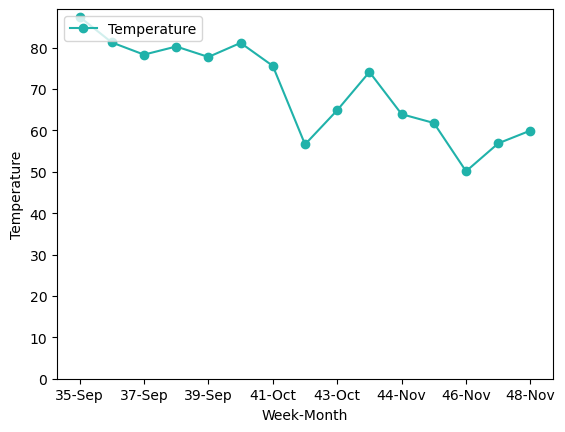

In [12]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming df has been defined previously
df['WM'] = df['week'].astype(str) + '-' + df['month'].astype(str) 

# Define the custom order for the x-axis
custom_order = ['35-Sep', '36-Sep', '37-Sep', '38-Sep', '39-Sep', '40-Oct', '41-Oct', '42-Oct', '43-Oct', '44-Oct', '44-Nov', '45-Nov', '46-Nov', '47-Nov', '48-Nov']

# Create a Categorical data type with the custom order
custom_order_cat = pd.Categorical(df['WM'], categories=custom_order, ordered=True)

# Assign the custom ordered categorical data back to the DataFrame
df['WM'] = custom_order_cat

# Create a Figure and Axes object
fig, ax = plt.subplots()

# Plot the line chart with the custom ordered x-axis
df.groupby('WM')['temperature'].mean().plot(kind='line', color='#20B2AA', marker='o', ax=ax)

ax.set_ylim(0, ax.get_ylim()[1])
# Customize labels and legends
ax.set_ylabel('Temperature')
ax.set_xlabel('Week-Month')
ax.legend(['Temperature'], loc='upper left')

plt.show()

We would have to wait till the 42nd week of the year which is the second week of october!